In [63]:

from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import pandas as pd
from rouge import Rouge
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('similarity_scores.csv')

In [65]:
df.shape

(50, 49)

In [66]:
df.columns

Index(['S.no', 'queries', 'manual_response', 'context', 'gemma_response',
       'deepseek_response', 'llama_response', 'mistral_response',
       'gpt_response', 'llama_similarity', 'gemma_similarity',
       'mistral_similarity', 'deepseek_similarity', 'gpt_similarity',
       'llama_response_bleu', 'llama_response_rouge1', 'llama_response_rouge2',
       'llama_response_rougel', 'llama_response_meteor', 'llama_response_ter',
       'llama_response_bert', 'gemma_response_bleu', 'gemma_response_rouge1',
       'gemma_response_rouge2', 'gemma_response_rougel',
       'gemma_response_meteor', 'gemma_response_ter', 'gemma_response_bert',
       'mistral_response_bleu', 'mistral_response_rouge1',
       'mistral_response_rouge2', 'mistral_response_rougel',
       'mistral_response_meteor', 'mistral_response_ter',
       'mistral_response_bert', 'deepseek_response_bleu',
       'deepseek_response_rouge1', 'deepseek_response_rouge2',
       'deepseek_response_rougel', 'deepseek_response_met

In [69]:
import re

def tensor_str_to_float(val):
    # If already a float, return as is
    if isinstance(val, float) or isinstance(val, int):
        return val
    # If it's a string like 'tensor([0.9803])', extract the float
    match = re.search(r"tensor\(\[([0-9.]+)\]\)", str(val))
    if match:
        return float(match.group(1))
    # Try to convert directly
    try:
        return float(val)
    except:
        return None  # or np.nan

# Example: Clean all BERT columns
bert_cols = [col for col in df.columns if col.endswith('_bert')]
for col in bert_cols:
    df[col] = df[col].apply(tensor_str_to_float)

In [77]:
# List of columns for which you want the average
cols = [
    'llama_similarity', 'gemma_similarity',
       'mistral_similarity', 'deepseek_similarity', 'gpt_similarity',
       'llama_response_bleu', 'llama_response_rouge1', 'llama_response_rouge2',
       'llama_response_rougel', 'llama_response_meteor', 'llama_response_ter',
       'llama_response_bert', 'gemma_response_bleu', 'gemma_response_rouge1',
       'gemma_response_rouge2', 'gemma_response_rougel',
       'gemma_response_meteor', 'gemma_response_ter', 'gemma_response_bert',
       'mistral_response_bleu', 'mistral_response_rouge1',
       'mistral_response_rouge2', 'mistral_response_rougel',
       'mistral_response_meteor', 'mistral_response_ter',
       'mistral_response_bert', 'deepseek_response_bleu',
       'deepseek_response_rouge1', 'deepseek_response_rouge2',
       'deepseek_response_rougel', 'deepseek_response_meteor',
       'deepseek_response_ter', 'deepseek_response_bert', 'gpt_response_bleu',
       'gpt_response_rouge1', 'gpt_response_rouge2', 'gpt_response_rougel',
       'gpt_response_meteor', 'gpt_response_ter', 'gpt_response_bert' ]

# Calculate the mean for each column
averages = df[cols].mean()

# Display the averages
print(averages)

llama_similarity             0.777552
gemma_similarity             0.709656
mistral_similarity           0.730498
deepseek_similarity          0.642523
gpt_similarity               0.766846
llama_response_bleu          0.240339
llama_response_rouge1        0.470378
llama_response_rouge2        0.322003
llama_response_rougel        0.455039
llama_response_meteor        0.554452
llama_response_ter           1.492914
llama_response_bert          0.905550
gemma_response_bleu          0.119583
gemma_response_rouge1        0.337900
gemma_response_rouge2        0.165411
gemma_response_rougel        0.306793
gemma_response_meteor        0.320473
gemma_response_ter           1.004289
gemma_response_bert          0.887368
mistral_response_bleu        0.101609
mistral_response_rouge1      0.332332
mistral_response_rouge2      0.165275
mistral_response_rougel      0.313343
mistral_response_meteor      0.396576
mistral_response_ter         2.373748
mistral_response_bert        0.883456
deepseek_res

In [75]:
averages_df = averages.reset_index()
averages_df.columns = ['column', 'average']
averages_df = averages_df.sort_values(by='column', ascending=True)
print(averages_df)

                      column    average
32    deepseek_response_bert   0.812122
26    deepseek_response_bleu   0.016383
30  deepseek_response_meteor   0.222549
27  deepseek_response_rouge1   0.161438
28  deepseek_response_rouge2   0.053364
29  deepseek_response_rougel   0.154943
31     deepseek_response_ter  91.599294
3        deepseek_similarity   0.642523
18       gemma_response_bert   0.887368
12       gemma_response_bleu   0.119583
16     gemma_response_meteor   0.320473
13     gemma_response_rouge1   0.337900
14     gemma_response_rouge2   0.165411
15     gemma_response_rougel   0.306793
17        gemma_response_ter   1.004289
1           gemma_similarity   0.709656
39         gpt_response_bert   0.909724
33         gpt_response_bleu   0.209099
37       gpt_response_meteor   0.493757
34       gpt_response_rouge1   0.455201
35       gpt_response_rouge2   0.279270
36       gpt_response_rougel   0.439132
38          gpt_response_ter   1.128121
4             gpt_similarity   0.766846


In [78]:
averages_df.to_csv('similarity_scores_averages.csv', index=False)

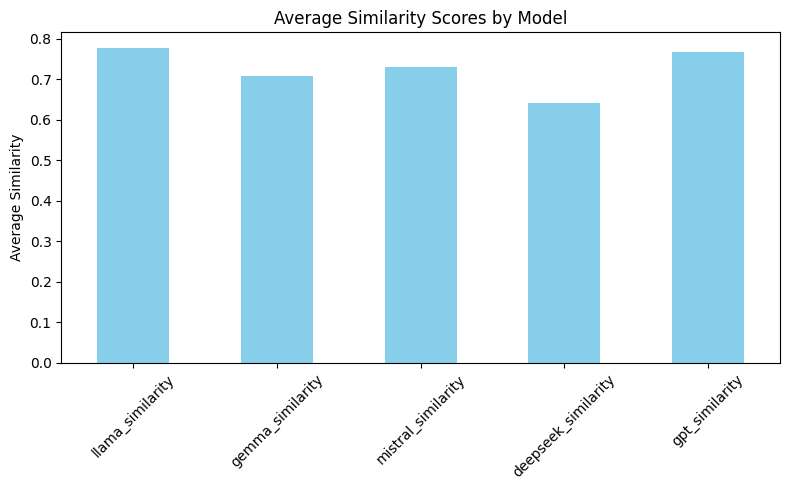

In [ ]:
# List of similarity columns
similarity_cols = [
    'llama_similarity', 'gemma_similarity', 'mistral_similarity',
    'deepseek_similarity', 'gpt_similarity'
]

# Calculate the mean for each similarity column
similarity_means = df[similarity_cols].mean()

# Create a bar plot
plt.figure(figsize=(8, 5))
similarity_means.plot(kind='bar', color='skyblue')
plt.ylabel('Average Similarity')
plt.title('Average Similarity Scores by Model')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

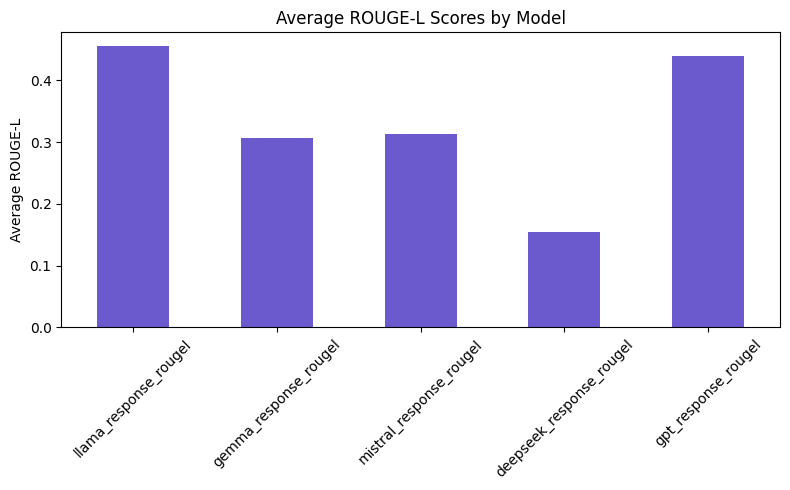

In [16]:
# List of response_rougel columns
rougel_cols = [
    'llama_response_rougel', 'gemma_response_rougel', 'mistral_response_rougel',
    'deepseek_response_rougel', 'gpt_response_rougel'
]

# Calculate the mean for each response_rougel column
rougel_means = df[rougel_cols].mean()

# Create a bar plot
plt.figure(figsize=(8, 5))
rougel_means.plot(kind='bar', color='slateblue')
plt.ylabel('Average ROUGE-L')
plt.title('Average ROUGE-L Scores by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

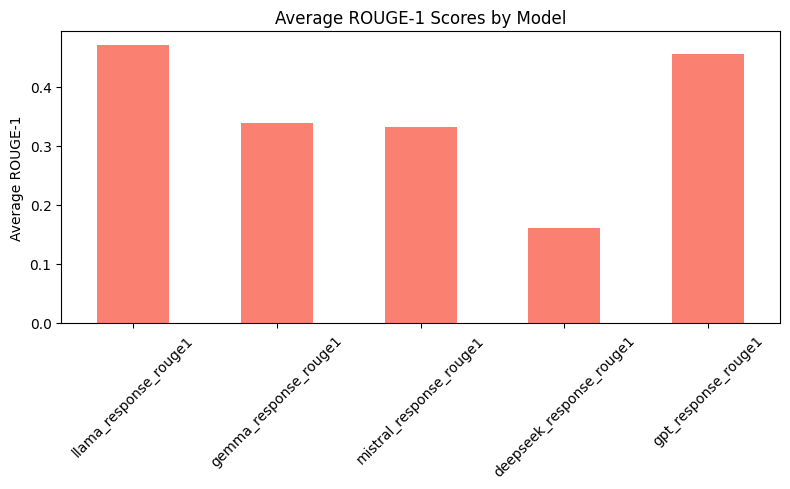

In [17]:
# List of response_rouge1 columns
rouge1_cols = [
    'llama_response_rouge1', 'gemma_response_rouge1', 'mistral_response_rouge1',
    'deepseek_response_rouge1', 'gpt_response_rouge1'
]

# Calculate the mean for each response_rouge1 column
rouge1_means = df[rouge1_cols].mean()

# Create a bar plot
plt.figure(figsize=(8, 5))
rouge1_means.plot(kind='bar', color='salmon')
plt.ylabel('Average ROUGE-1')
plt.title('Average ROUGE-1 Scores by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

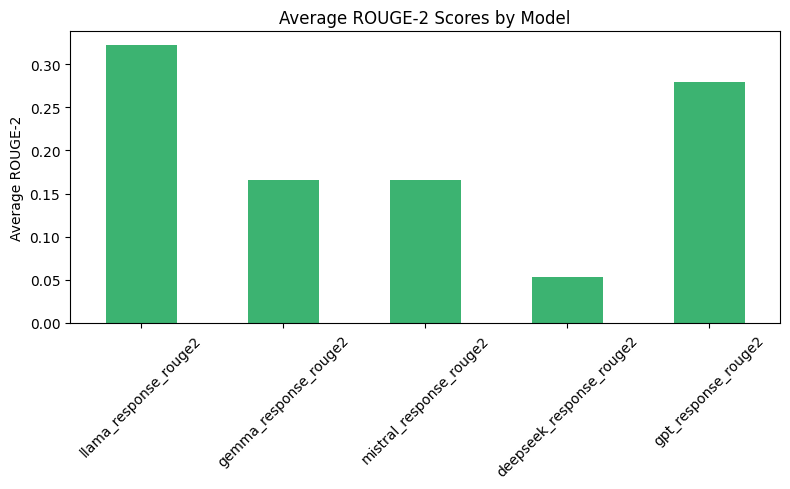

In [18]:
# List of response_rouge2 columns
rouge2_cols = [
    'llama_response_rouge2', 'gemma_response_rouge2', 'mistral_response_rouge2',
    'deepseek_response_rouge2', 'gpt_response_rouge2'
]

# Calculate the mean for each response_rouge2 column
rouge2_means = df[rouge2_cols].mean()

# Create a bar plot
plt.figure(figsize=(8, 5))
rouge2_means.plot(kind='bar', color='mediumseagreen')
plt.ylabel('Average ROUGE-2')
plt.title('Average ROUGE-2 Scores by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

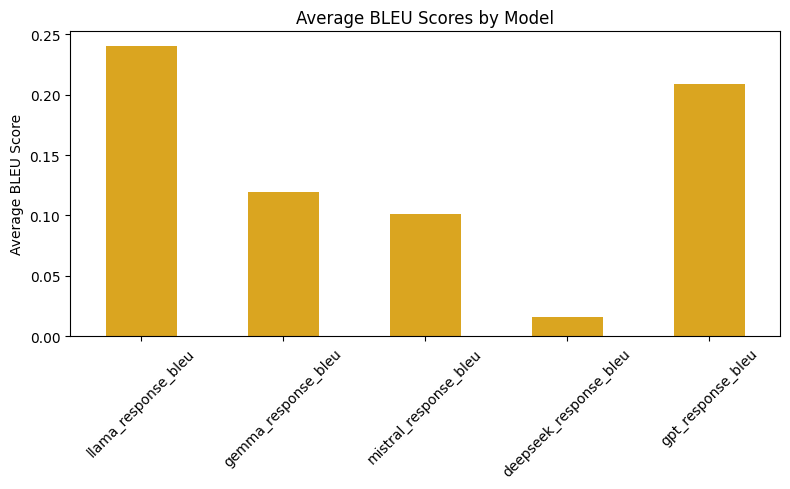

In [19]:
# List of BLEU score columns
bleu_cols = [
    'llama_response_bleu', 'gemma_response_bleu', 'mistral_response_bleu',
    'deepseek_response_bleu', 'gpt_response_bleu'
]

# Calculate the mean for each BLEU score column
bleu_means = df[bleu_cols].mean()

# Create a bar plot
plt.figure(figsize=(8, 5))
bleu_means.plot(kind='bar', color='goldenrod')
plt.ylabel('Average BLEU Score')
plt.title('Average BLEU Scores by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

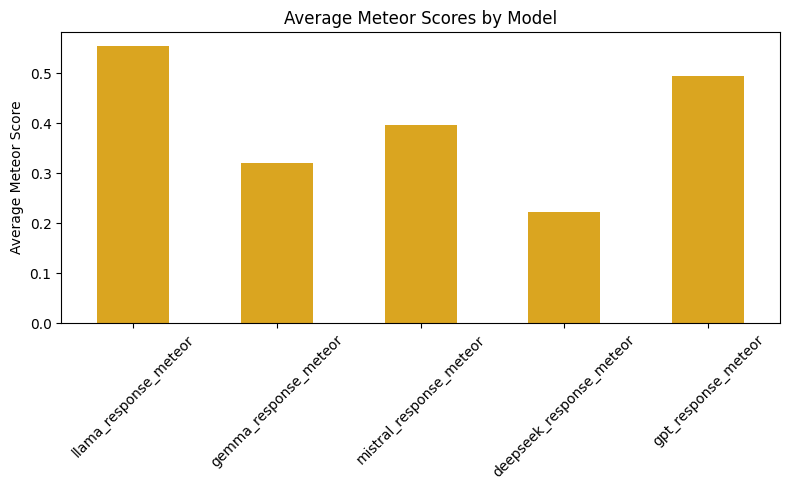

In [20]:
meteor_cols = [
    'llama_response_meteor', 'gemma_response_meteor', 'mistral_response_meteor',
    'deepseek_response_meteor', 'gpt_response_meteor'
]

# Calculate the mean for each BLEU score column
meteor_means = df[meteor_cols].mean()

# Create a bar plot
plt.figure(figsize=(8, 5))
meteor_means.plot(kind='bar', color='goldenrod')
plt.ylabel('Average Meteor Score')
plt.title('Average Meteor Scores by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

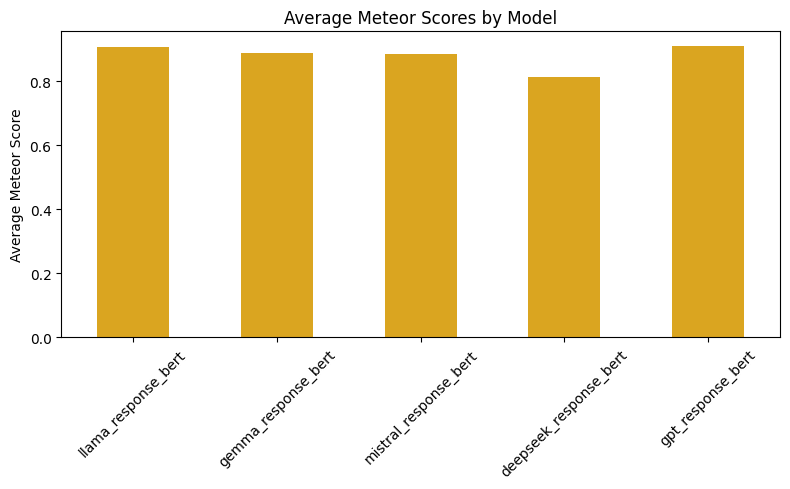

In [72]:
bert_means = df[bert_cols].mean()

# Create a bar plot
plt.figure(figsize=(8, 5))
bert_means.plot(kind='bar', color='goldenrod')
plt.ylabel('Average Meteor Score')
plt.title('Average Meteor Scores by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
medians = df[cols].median()

# Display the medians
print(medians)

# If you want it as a DataFrame sorted by column name:
medians_df = medians.reset_index()
medians_df.columns = ['column', 'median']
medians_df = medians_df.sort_values(by='column', ascending=True)
print(medians_df)

llama_similarity            0.795895
gemma_similarity            0.710774
mistral_similarity          0.732983
deepseek_similarity         0.661576
gpt_similarity              0.799540
llama_response_bleu         0.181238
llama_response_rouge1       0.456995
llama_response_rouge2       0.294805
llama_response_rougel       0.444742
gemma_response_bleu         0.025134
gemma_response_rouge1       0.283916
gemma_response_rouge2       0.078708
gemma_response_rougel       0.225865
mistral_response_bleu       0.051367
mistral_response_rouge1     0.286186
mistral_response_rouge2     0.088008
mistral_response_rougel     0.265294
deepseek_response_bleu      0.006369
deepseek_response_rouge1    0.152759
deepseek_response_rouge2    0.039080
deepseek_response_rougel    0.148529
gpt_response_bleu           0.155694
gpt_response_rouge1         0.443182
gpt_response_rouge2         0.241667
gpt_response_rougel         0.428452
dtype: float64
                      column    median
17    deepseek_respon

In [23]:
import nltk
from nltk.translate import bleu_score
from nltk.translate.meteor_score import meteor_score
import sacrebleu
from evaluate import load
nltk.download('wordnet')

/Users/shivamsinghrawat/Desktop/Assignments/Text Mining/Project/RAG-LLM-Analysis/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shivamsinghrawat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
hypothesis = df['llama_response'][8]
reference = df['manual_response'][8]

In [49]:
# ----------------------------
# 2. METEOR Score Implementation
# ----------------------------
def calculate_meteor(reference, hypothesis):
    return meteor_score(
        [nltk.word_tokenize(reference)],
        nltk.word_tokenize(hypothesis)
    )

# meteor = calculate_meteor(reference, machine_translation)
# print(f"METEOR: {meteor:.4f} (scale: 0-1)")

# ----------------------------
# 3. TER Score Implementation
# ----------------------------
def calculate_ter(reference, hypothesis):
    ter = load('ter')
    ter_score = ter.compute(
        predictions=[hypothesis],
        references=[reference]
    )['score']
    print(f"TER: {ter_score/100:.4f} (lower is better, 0=perfect)")

# ----------------------------
# Key Takeaways Summary
# ----------------------------

meteor = calculate_meteor(reference, hypothesis)
print(f"METEOR: {meteor:.4f} (scale: 0-1)")
calculate_ter(reference, hypothesis)

print("\nKEY TAKEAWAYS:")
print("2. METEOR: Better for synonyms/stemming (needs WordNet)")
print("3. TER: Measures edit effort (good for post-editing analysis)")
print("\nTip: Use SacreBLEU for reproducible BLEU scores")


METEOR: 0.7673 (scale: 0-1)
TER: 0.9688 (lower is better, 0=perfect)

KEY TAKEAWAYS:
2. METEOR: Better for synonyms/stemming (needs WordNet)
3. TER: Measures edit effort (good for post-editing analysis)

Tip: Use SacreBLEU for reproducible BLEU scores


In [51]:
from bert_score import score
P, R, F1 = score([hypothesis], [reference], lang="en")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
print("Precision: ", P)
print("Recall: ", R)
print("F1: ", F1)

Precision:  tensor([0.9266])
Recall:  tensor([0.9495])
F1:  tensor([0.9379])


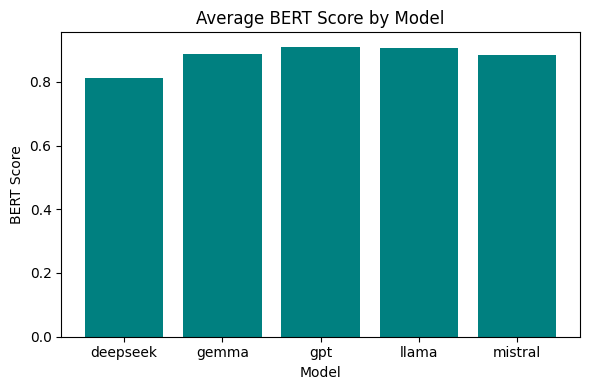

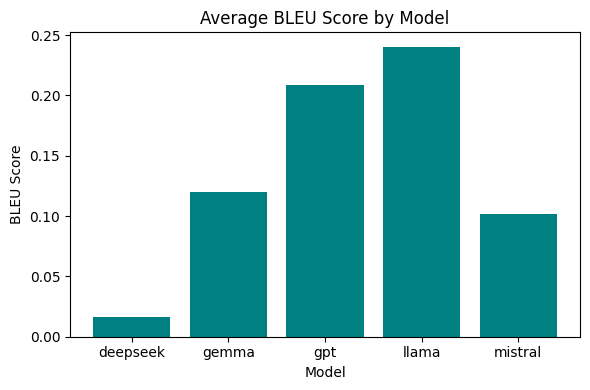

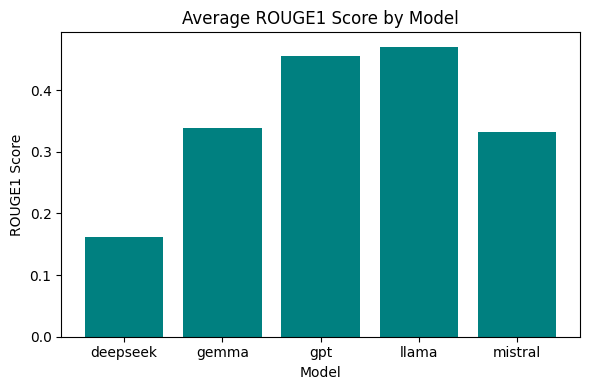

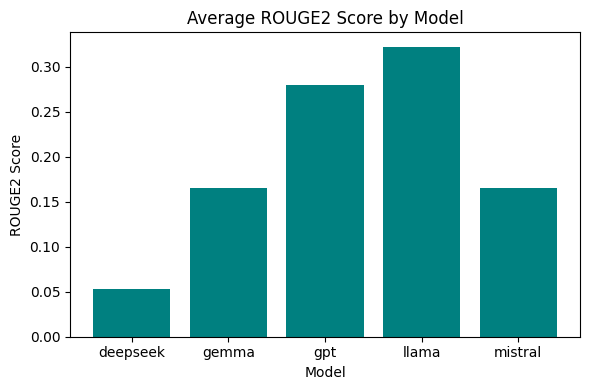

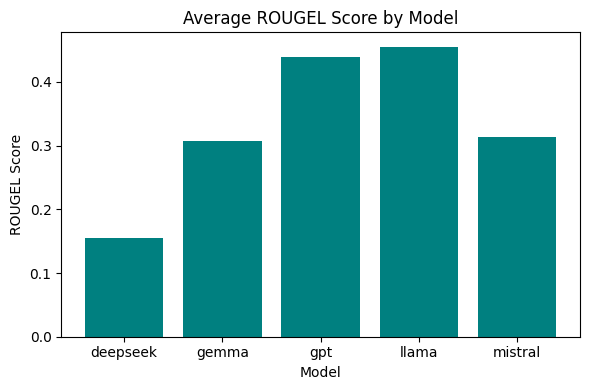

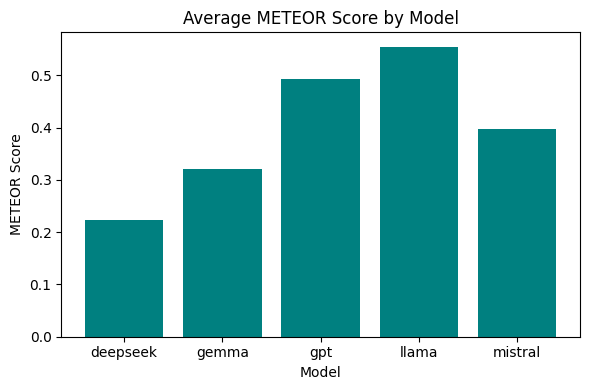

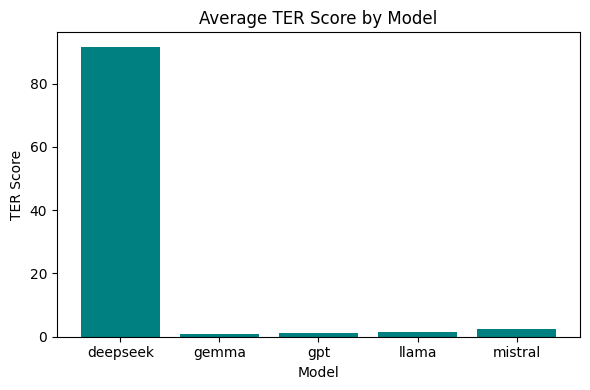

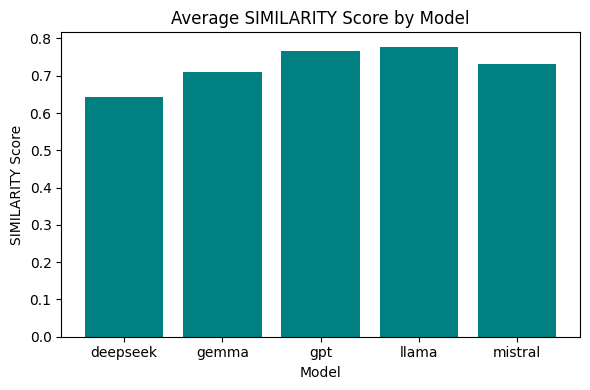

In [80]:
# Fix the column name construction in your plotting loop

models = ['deepseek', 'gemma', 'gpt', 'llama', 'mistral']
metrics = {
    'bert':      '_response_bert',
    'bleu':      '_response_bleu',
    'rouge1':    '_response_rouge1',
    'rouge2':    '_response_rouge2',
    'rougel':    '_response_rougel',
    'meteor':    '_response_meteor',
    'ter':       '_response_ter',
    'similarity':'_similarity'
}

for metric, suffix in metrics.items():
    values = []
    labels = []
    for model in models:
        if metric == 'similarity':
            col = f"{model}_similarity"
        else:
            col = f"{model}{suffix}"  # <-- FIXED: remove extra '_response'
        row = averages_df[averages_df['column'] == col]
        if not row.empty:
            values.append(float(row['average'].iloc[0]))
            labels.append(model)
    if values:  # Only plot if there are values
        plt.figure(figsize=(6, 4))
        plt.bar(labels, values, color='teal')
        plt.title(f'Average {metric.upper()} Score by Model')
        plt.ylabel(f'{metric.upper()} Score')
        plt.xlabel('Model')
        plt.tight_layout()
        plt.show()